# Predicción de la tasa de desempleo nacional (España).    
## Series temporales. Método ARIMA

Una serie temporal, es una serie de observaciones que se obtienen a lo largo del tiempo en intervalos iguales. Es una secuencia de tiempo discreta (no es contínua). El análisis de las series temporales implica la búsqueda de patrones, y la predicción en estas series se basa en predecir valores futuros en función de los valores pasados.

In [3]:
#Importamos el dataset
read.unemp = function(file = './tasa_con_habitantes_2006-2018.csv')
{
    ## Leemos el csv
  unemp.data <- read.csv(file, header = TRUE, stringsAsFactors = FALSE, sep = ';')

  ## Eliminamos las filas que no tienen nulos, sellecionando las completas (si hubiese)
  unemp.data[complete.cases(unemp.data), ]
}

unemp.data = read.unemp()

In [4]:
#Vemos el dataset 
str(unemp.data)
head(unemp.data)


'data.frame':	1257205 obs. of  6 variables:
 $ ano       : int  2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 ...
 $ mes       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ prov      : chr  "Almería" "Almería" "Almería" "Almería" ...
 $ mun       : chr  "Abla" "Abla" "Abla" "Abla" ...
 $ tasa      : num  0.0372 0.0372 0.0472 0.0452 0.0432 ...
 $ habitantes: int  1504 1504 1504 1504 1504 1504 1504 1504 1504 1504 ...


ano,mes,prov,mun,tasa,habitantes
2006,1,Almería,Abla,0.03723404,1504
2006,2,Almería,Abla,0.03723404,1504
2006,3,Almería,Abla,0.04720745,1504
2006,4,Almería,Abla,0.04521277,1504
2006,5,Almería,Abla,0.04321809,1504
2006,6,Almería,Abla,0.04321809,1504


    
En nuestro datateset tenemos observaciones mensuales de la tasa de desempleo en los municipos españoles entre 2006 y 2018, pero vamos a trabajar con la media nacional. Si calculásemos la media aritmética de la tasa de desempleo sin más, ésta no sería representativa, ya que para calcular la tasa de paro se divide el número de parados entre el número de habitantes y hay municipios que tienen muchos mas habitantes que otros. Por ejemplo, si suponemos que Madrid tiene una tasa de 0,08(imaginemos con 2 millon de habitantes), tendría 80.000 parados y Villaconejos una tasa de 0,02(imaginemos con 100.000 habitantes) tendría 2.000 parados. Si hacemos una media aritmética de ésto, la tasa media nos saldría 0,05. Ahora, si sumamos por un lado los parados de los dos municipios, por otro los habitantes y hacemos la media, tenemos una tasa media de (82000/1100000) de 0,074, mucho más cercano y real al 0,08 que al 0,05 que habíamos obtenido. Esta tasa sí sería representativa ya que Madrid tiene bastantes más habitantes que Villaconejos o mayor peso desde el punto de vista estadístico. Para resolver este problema vamos a calcular la tasa media ponderada con el número de habitantes. 




In [74]:
library(dplyr)
a <-unemp.data%>%
        group_by(ano,mes)%>%
        summarise(tasa_media = weighted.mean(tasa,habitantes))
tasa_media_nov2018 <- data.frame(a)
row.names(tasa_media_nov2018) <- NULL
setnames(tasa_media_nov2018, c("ano", "mes", "tasa_media"), c("year", "month", "rate"))
dim(tasa_media_nov2018)
tasa_media <- tasa_media_nov2018[-c(151:155), ] # Quitamos las ultimas filas para evaluar la predicción de test, de Julio a Noviembre de 2018
str(tasa_media)
tail(tasa_media)

[1] 155   3

'data.frame':	150 obs. of  3 variables:
 $ year : int  2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 ...
 $ month: int  1 2 3 4 5 6 7 8 9 10 ...
 $ rate : num  0,0465 0,0464 0,0460 0,0444 0,0429 ...


,year,month,rate
145,2018,1,"0,07433897"
146,2018,2,"0,07420398"
147,2018,3,"0,07318306"
148,2018,4,"0,07133047"
149,2018,5,"0,06953833"
150,2018,6,"0,06761443"


Vamos a ver la tendencia que sigue la curva del número de parados, para ello dibujamos la media anual nacional para los años de estudio (2006-2018).


ano,mes,tasa_media
2006,1,"0,04645623"
2006,2,"0,04640867"
2006,3,"0,04596478"
2006,4,"0,04440619"
2006,5,"0,04288410"
2006,6,"0,04192599"


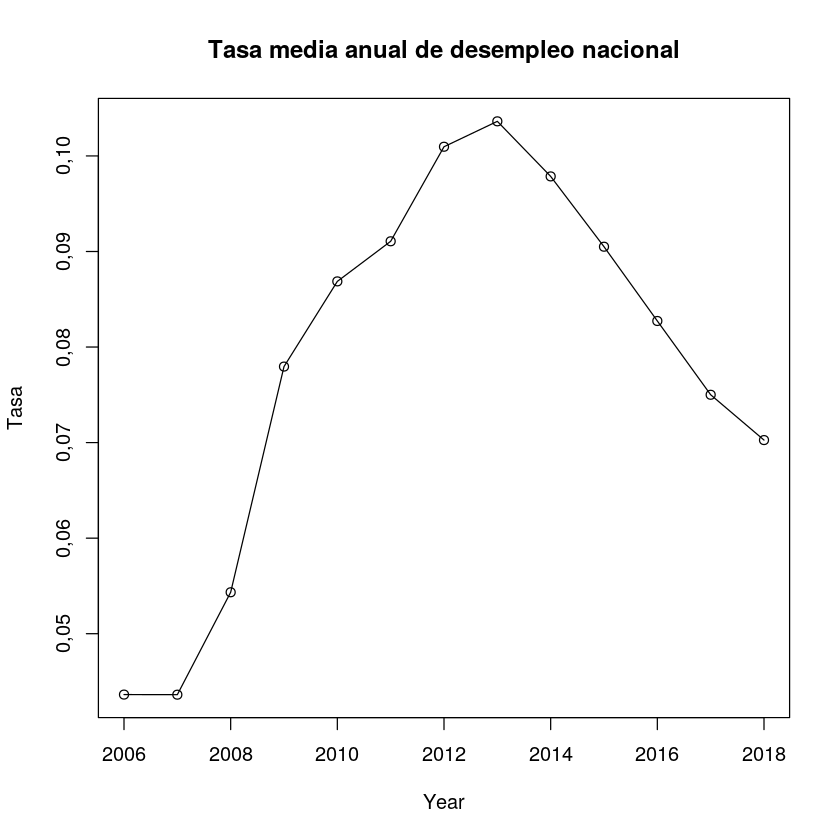

In [35]:
Tasa <- tapply(a$tasa_media, a$ano, mean)
plot(Year, Tasa,  main = "Tasa media anual de desempleo nacional"); lines(Year, Tasa)

Vemos que hay una fuerte subidas, una en el año 2008-2009 y sigue aumentando durante el  período 2011-2012, a partir del 2013, la tendencia anual es a bajar.

Vamos a trabajar con la clase 'ts' de R, para convertir el df en serie temporal.


In [36]:
require(repr)
require(forecast)

Loading required package: repr
Loading required package: forecast


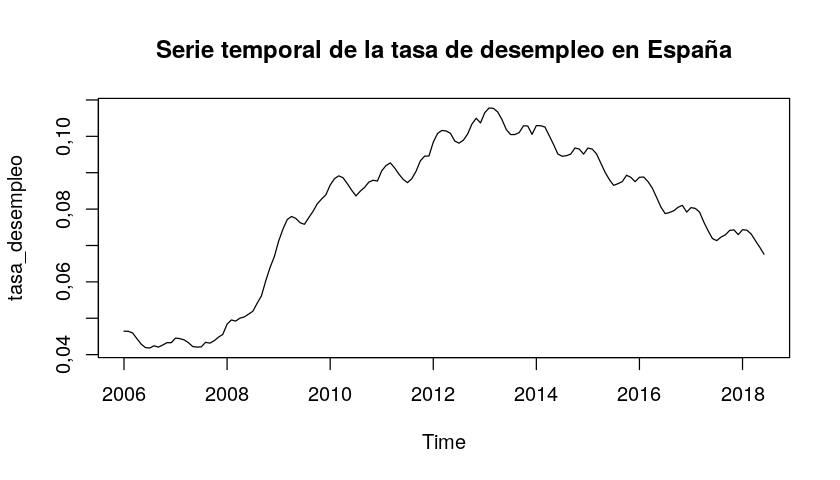

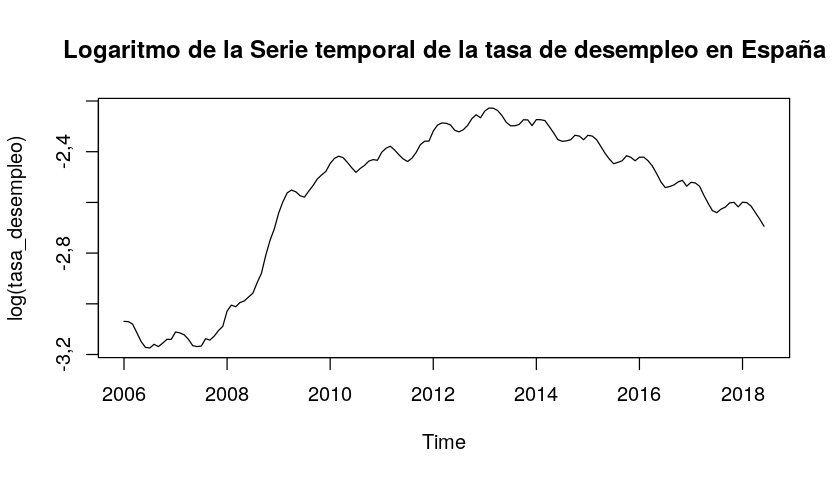

In [37]:
#Convertimos a serie temporal con la función ts
tasa_desempleo <- ts(tasa_media[,3], start = 2006, freq = 12)

#Dibujamos la serie
options(repr.pmales.extlot.width=8, repr.plot.height=4)
plot(tasa_desempleo, main = 'Serie temporal de la tasa de desempleo en España')
#Dibujamos la serie con la transformación logarítmica (normalización)
options(repr.pmales.extlot.width=8, repr.plot.height=4)
plot(log(tasa_desempleo), main = 'Logaritmo de la Serie temporal de la tasa de desempleo en España')

Esto constituye una serie temporal "discreta" donde todas las observaciones se realizan en intervalos de tiempo iguales (mensualmente en este caso). Se aprecia un aumento durante la crisis del 2009 y una tendencia bajista de la tasa de desempleo desde 2013.

**Propiedades de las series temporales**    
Decimos que una serie temporal con una variación constante es estacionaria, y las propiedades de una serie temporal estacionaria no varían con el tiempo.

Existe un patrón estacional cuando una serie está influenciada por factores estacionales (por ejemplo, el trimestre del año, el mes o el día de la semana). La estacionalidad es siempre de un período fijo y conocido. Por lo que las series temporales estacionales a veces se llaman series temporales periódicas.

Existe un patrón cíclico cuando los datos muestran subidas y caídas que no son de un período fijo. Como por ejemplo, los ciclos económicos que suelen durar varios años, pero de antemano se desconoce la duración del ciclo actual.

Existe una tendencia cuando hay un aumento o disminución a largo plazo en los datos. No tiene que ser lineal. 

En el gráfico anterior, vemos las siguientes características en esta serie de tiempo:

Esta serie temporal tiene dos tendencias, una subida del 2008 al 2013 y una bajada del 2013 a 2019, que se corresponde más o menos con el patrón cíclico de los ciclos económicos.
Tiene un componente estacional, en los meses de verano, la tasa de desempleo disminuye (se aprecia en un gráfico más adelante).
Vamos a utilizar la serie de log transformado (normalizacion) para un análisis más detallado.
Cualquier serie temporal con una tendencia varía con el tiempo, lo que significa que no es estacionaria.

Una serie temporal estacionaria sin patrón estacional o cíclico y sin tendencia perceptible se dice que es independiente distribuida de manera idéntica o i.i.d. Estas series temporales i.i.d. tienen una distribución normal en forma de campana y una gráfica Q-Q de línea recta. Tal serie temporal también se llama ruido blanco.

Vamos a ver la distribución de nuestra serie:

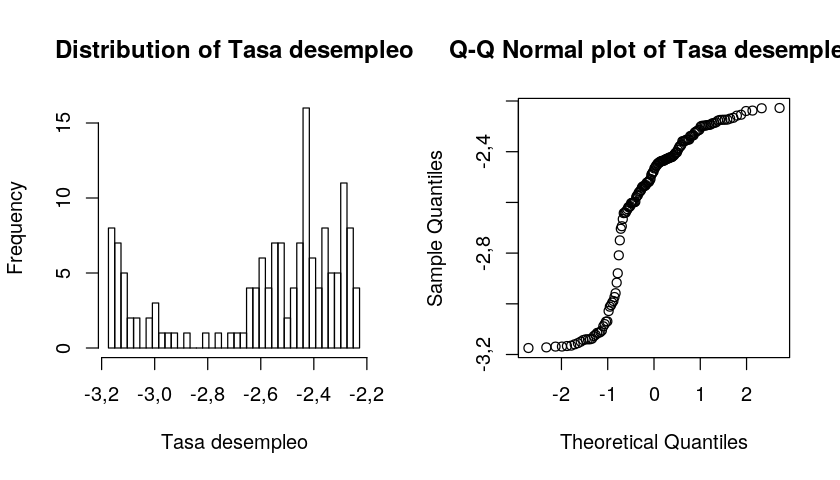

In [38]:
#Plot the distribution - histogram & QQ plot of the time series
dist.ts = function(df, col = 'residual', bins = 40)
{
  par(mfrow = c(1,2))
  temp = as.vector(df)
  breaks = seq(min(temp), max(temp), length.out = (bins + 1))
  hist(temp, breaks = breaks, main = paste('Distribution of', col), xlab = col)
  qqnorm(temp, main = paste('Q-Q Normal plot of', col))
  par(mfrow = c(1,1))
}

options(repr.pmales.extlot.width=8, repr.plot.height=4)
dist.ts(log(tasa_desempleo), col = 'Tasa desempleo')

Vemos que la gráfica Q-Q no es una línea recta y, por lo tanto, esto no es una i.i.d. con distribución normal. Esto confirma las observaciones iniciales de que este conjunto de datos tiene ciertos patrones y tendencias.

Veamos algunas formas de detectar patrones.

La **autocorrelación**, también conocida como correlación en serie, es la correlación de una serie temporal con una "copia retrasada" de sí misma. Dicho de otro modo, es la similitud entre las observaciones, en función del tiempo de retraso. El análisis de la autocorrelación es una herramienta matemática para encontrar patrones, como la presencia de periodicidad o estacionalidad.

En estadística, la autocorrelación de un proceso aleatorio es la correlación de Pearson entre los valores de la serie en diferentes momentos. Es como una función de los de como varía la serie entre dos tiempos o del intevalo. Èsta se denomina función de correlación automática o ACF. La ACF se utilizadas para encontrar patrones. Específicamente, la ACF indica la correlación entre puntos separados por varios unintervalos de tiempo. Hay que tener en cuenta que para cualquier serie, la autocorrleación en el retraso cero es igual a uno.

También podemos definir una autocorrelación parcial de segundo orden. La función de autocorrelación parcial (PACF) proporciona la correlación parcial de una serie de tiempo con sus propios valores rezagados, controlando los valores de la serie temporal en todos los intervalos más cortos. Se diferencia con la función de autocorrelación, en que no controla para otros retrasos. Esta función desempeña un papel importante en los análisis de datos dirigidos a identificar la extensión del retraso en un modelo autorregresivo (AR), que describiremos a continuacion.

Ahora, vamos a trazar el ACF y PACF de nuestros datos de tasa de desempleo nacional

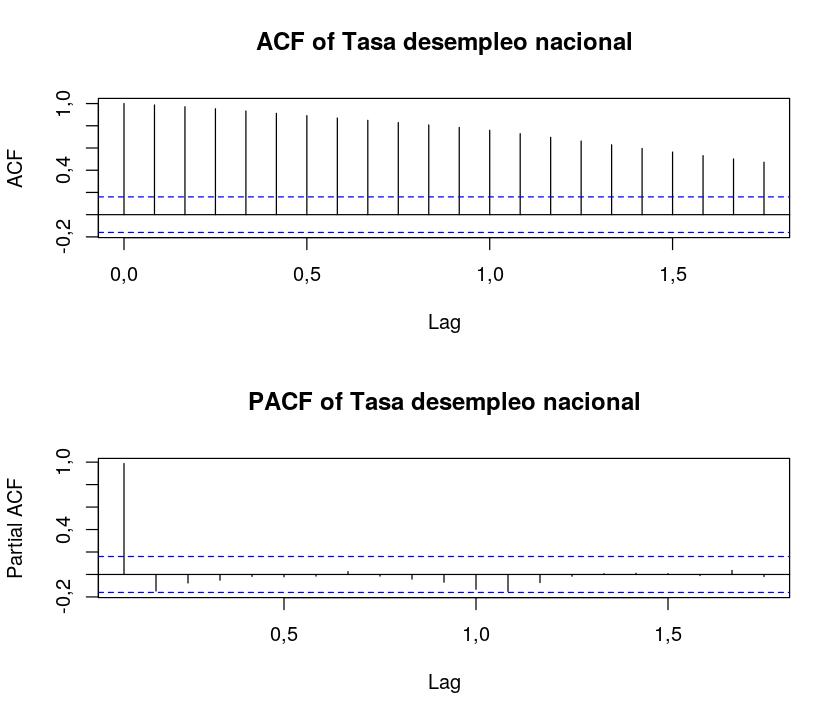

In [39]:
#Plot de las funciones de Autocorrelacion y Autocorrelacion parcial
plot.acf <- function(df, col = 'remainder', is.df =TRUE)
{
  if(is.df) temp <- df[, col]
  else temp <- df
  par(mfrow = c(2,1))
  acf(temp, main = paste('ACF of', col))
  pacf(temp, main = paste('PACF of', col))
  par(mfrow = c(1,1))
}
      
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf((tasa_desempleo), col = 'Tasa desempleo nacional', is.df = F)

Las líneas de puntos azules en los gráficos ACF y PACF son los intervalos de confianza del 95% para los valores de correlación. Las líneas verticales muestran la correlación. Cualquier línea vertical que cruce las líneas de puntos azules indica un valor de correlación significativo. En una i.i.d. las series de tiempo distribuidas normalmente no tendrán valores significativos de ACF o PACF más allá del retraso 0. En este caso, el gráfico ACF tiene varios retrasos significativos y muestra cierto patrón de caída. El gráfico PACF muestra valores significativos para más de un retraso, lo que indica que podría haber una tendencia. Vemos que esto no es una serie temporal estacionaria.

El proceso de extracción de la tendencia, el ciclo y los componentes estacionales se denomina descomposición. Vamos a ver los métodos de descomposición.


**Descomposición basada en tasas de variación**.    
Esta es una técnica importante para todos los tipos de análisis de series temporales, especialmente para el ajuste estacional. Busca construir, a partir de una serie temporal observada, una serie de componentes (que podrían usarse para reconstruir el original mediante adiciones o multiplicaciones) donde cada una de ellas tiene una cierta característica o tipo de comportamiento. Por ejemplo, las series de tiempo generalmente se descomponen en:

${T_t}$, el componente de tendencia en el tiempo t, refleja la tendencia a largo plazo de la serie.

${C_t}$ el componente cíclico en el tiempo t, que describe fluctuaciones repetidas pero no periódicas.

${S_t}$, el componente estacional en el tiempo t, reflejando la estacionalidad.

${I_t}$, Es el componente irregular (o "ruido") en el tiempo t, que describe influencias aleatorias e irregulares. Esta es la parte de la serie que no se puede atribuir a los componentes estacionales, de ciclo o de tendencia y se conoce como residual, resto o error. Por lo tanto, una serie temporal que utiliza un modelo aditivo se puede considerar como:

${Y_t}$ = ${T_t}$ + ${C_t}$ + ${S_t}$ + ${I_t}$

mientras que, un modelo multiplicativo sería:

${Y_t}$ = ${T_t}$ x ${C_t}$ x ${S_t}$ x ${I_t}$

Se usaría un modelo aditivo cuando las variaciones en torno a la tendencia no varíen con el nivel de las series temporaleso, mientras que el modelo multiplicativo sería apropiado si la tendencia es proporcional al nivel de la serie temporal.

**Descomposición STL**    
A veces, la tendencia y los componentes cíclicos se agrupan en uno, llamado componente de tendencia-ciclo. El componente de ciclo de tendencia solo se puede denominar "componente de tendencia", aunque pueda contener un comportamiento cíclico. Por ejemplo, una descomposición estacional de las series de tiempo, conocida como *descomposición estacional y de tendencia* utilizando el modelo de Loess o STL, descompone una serie de tiempo en componentes de tendencia estacional e irregular utilizando loess y traza los componentes por separado, por lo que el componente cíclico (si está presente en Los datos) se incluyen en el gráfico del componente "tendencia". A continuación, en el período de 12 años que tenemos se observa ligeramente el componente cíclico (viene de una breve tendencia de bajada o lateral, 2006-2008, alcanza un máximo en 2013 y vuelve a bajar hasta 2018. Sí se observa un descenso estacional en los meses de verano. 

Como su nombre lo indica, este modelo hace lo siguiente:

La tendencia se elimina utilizando un modelo de regresión LOESS.
El componente estacional se elimina mediante una regresión en componentes periódicos.
El resto se conoce como el residual.

A continuación, aplicaremos el modelo de descomposición STL a nuestra serie temporal y veremos si esto elimina  la tendencia y la estacionalidad.








 Time-Series [1:150, 1:3] from 2006 to 2018: 0,002164 0,002788 0,002515 0,001218 -0,000502 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "seasonal" "trend" "remainder"


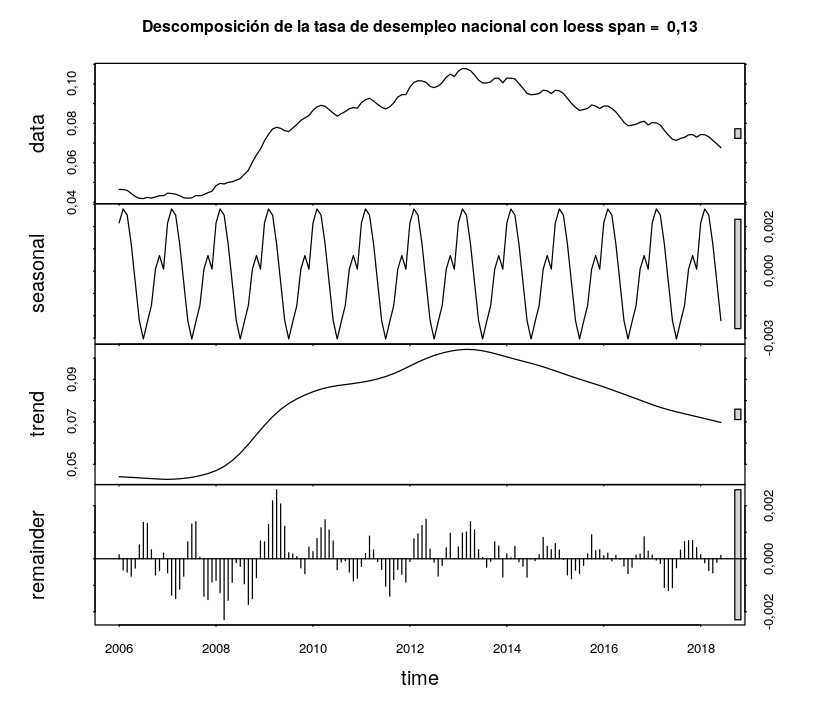

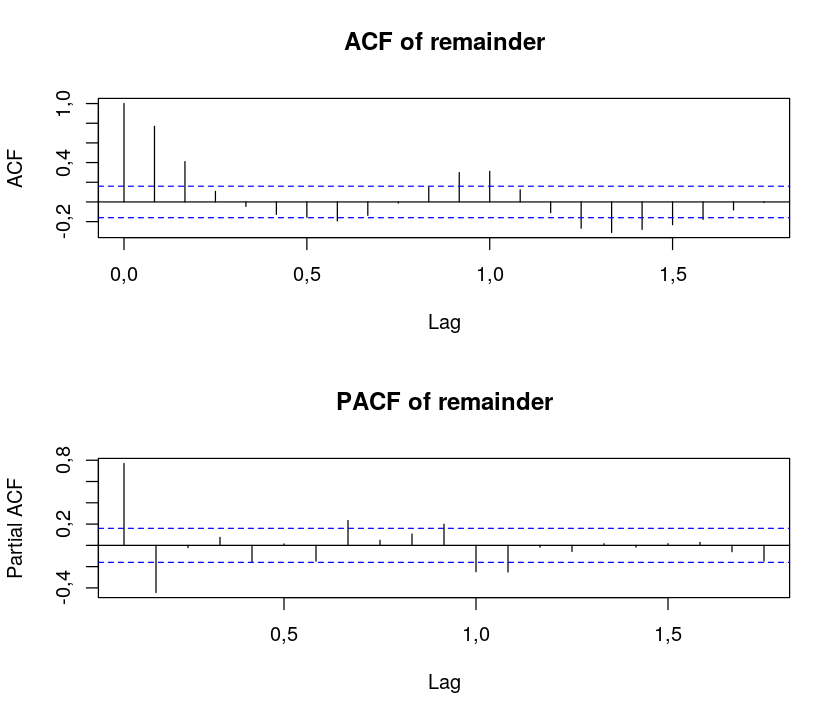

In [40]:
#Function for STL decomposition of a time series into components 
ts.decomp <- function(df, col = 'Series Name', span = 0.13, Mult = TRUE)
{
  if(Mult) temp = log(df)  else temp = df
  spans = span * length(temp)  
  fit <- stl(temp, s.window = "periodic", t.window = spans)
  plot(fit, main = paste('Descomposición de la',col,'con loess span = ', as.character(span)))
  fit$time.series
}

tasa.decomp <- ts.decomp((tasa_desempleo), col = 'tasa de desempleo nacional', Mult = FALSE)
str(tasa.decomp)

#Plot the ACF & PACF of the remainder
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf(tasa.decomp[, 3], is.df = FALSE)

Si el proceso STL elimina la tendencia y los patrones con éxito, la distribución del resto o residuo (*remainder*) debe ser i.i.d. con ACF y PACF que no muestran retrasos significativos distintos de cero. De los gráficos de ACF y PACF del residuo, todavía vemos algunos valores significativos de retardo no cero. Así que el proceso STL no ha eliminado la tendencia o los patrones por completo.

### Modelos ARIMA para la serie residual.

Ahora que hemos mostrado propiedades básicas de las series de tiempo y el método de descomposición de STL, vamos a ver los modelos para tratar los residuos. Trabajaremos con lo que se conoce como modelo autorregresivo integrado de media móvil o ARIMA. En el fondo, estos modelos que se muestran a continuación son solo casos especiales de regresión lineal.

#### Modelo autoregresivo ####

Los valores de una **serie temporal AR** o de **autoregresión** se determinan mediante una combinación lineal de los valores pasados. En otras palabras, el modelo de AR explica la correlación serial en los valores de la serie temporal. Podemos escribir el valor de una serie autorregresiva o series AR (p) en el tiempo t como:

${x_t}$ = ${α_1}$${x_{t-1}}$ + ${α_2}$${x_{t-2}}$...+ - ${α_p}$${x_{t-p}}$ + ${wt}$

Los modelos de AR son específicos para series de tiempo estacionarias. Si la varianza no es constante o el componente de tendencia no se ha eliminado, los modelos AR no producirán resultados satisfactorios.

#### Modelo de media móvil####
Para una *media móvil* o modelo *MA*, el valor de las series temporales en el tiempo t está determinado por una combinación lineal de términos de ruido blanco pasados. En otras palabras, el modelo de MA explica la correlación de series en términos de ruido. Podemos escribir el modelo MA (q) como la combinación lineal de los últimos q términos de ruido blanco(wi):

${x_t}$ = ${wt}$ + ${β_1}$${w_{t-1}}$ + ${β_2}$${w_{t-2}}$...+ ${β_q}$${w_{t-q}}$                                 

 
Los modelos MA son específicamente para series de tiempo estacionarias. Si la varianza no es constante o el componente de tendencia no se ha eliminado, los modelos MA tampoco producirán resultados satisfactorios.

#### El modelo de media móvil autoregresivo####
Podemos combinar los modelos AR y MA para crear una media móvil autorregresiva o un modelo ARMA. Este modelo explica la correlación serial tanto en términos de ruido como en valores. Podemos escribir un modelo ARMA de orden (p, q) como:

${x_t}$ = ${α_1}$${x_{t-1}}$ + ${α_2}$${x_{t-2}}$...+ - ${α_p}$${x_{t-p}}$${w_t}$ +  ${β_1}$${w_{t-1}}$ + ${β_2}$${w_{t-2}}$...+ ${β_q}$${w_{t-q}}$  

 
#### Modelo autorregresivo integrado de media móvil
La media móvil integrada autorregresiva o modelo ARIMA agrega un término integral al modelo ARMA. El componente de integración modela una de las partes no estacionarias de una serie de tiempo. El modelo ARIMA se define por órdenes p, d, q. El orden del operador de diferenciación del término integrador se define por d.

Ahora, intentemos estimar los parámetros ARIMA (p, d, q) de la serie de tiempo (recordamos, que esta es una serie de tiempo no estacionaria) y sacamos un resumen del mejor modelo y trazamos el ACF y el PACF del residuo. 



In [42]:
# Estimación del modelo ARIMA para el residuo del STL
ts.model = function(ts, col = 'remainder', order = c(0,0,1))
{
  mod = arima(ts, order = order, include.mean = FALSE)
  print(mod)
  mod
}

arima.estimate1 <- ts.model(tasa.decomp[, 3], order = c(1,0,1))#ARIMA(1,0,1) model
arima.estimate2 <- ts.model(tasa.decomp[, 3], order = c(0,1,1))#ARIMA(0,1,1) model
arima.estimate3 <- ts.model(tasa.decomp[, 3], order = c(1,1,3))#ARIMA(1,1,3) model 
arima.estimate4 <- ts.model(tasa.decomp[, 3], order = c(0,1,5))#ARIMA(0,1,5) model
arima.estimate5 <- ts.model(tasa.decomp[, 3], order = c(2,1,3))#ARIMA(2,1,3) model
arima.estimate6 <- ts.model(tasa.decomp[, 3], order = c(3,0,4))#ARIMA(3,0,4) model
arima.estimate7 <- ts.model(tasa.decomp[, 3], order = c(4,0,3))#ARIMA(4,0,5) model
arima.estimate8 <- ts.model(tasa.decomp[, 3], order = c(4,1,5))#ARIMA(4,1,5) model

cat(paste('Sigma^2 of the original series = ', as.character(var((tasa_desempleo)))))


Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1     ma1
      0,6452  0,3855
s.e.  0,0689  0,0673

sigma^2 estimated as 2,303e-07:  log likelihood = 932,89,  aic = -1859,77

Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ma1
      0,3016
s.e.  0,0688

sigma^2 estimated as 2,778e-07:  log likelihood = 913,22,  aic = -1822,43

Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1      ma1      ma2      ma3
      0,4490  -0,3244  -0,3621  -0,3134
s.e.  0,1187   0,1295   0,0870   0,0858

sigma^2 estimated as 2,156e-07:  log likelihood = 930,23,  aic = -1850,46

Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ma1      ma2      ma3      ma4      ma5
      0,2135  -0,2895  -0,4649  -0,1821  -0,2769
s.e.  0,0847   0,0878   0,0684   0,0873   0,0731

sigma^2 estimated as 2,036e-07:  log likelihood = 934,32,  aic = -1856,64

Call:
arima(x = ts, order = order, inc

El modelo ARIMA(3,0,4) con los siguientes coeficientes tienen el menor AIC (Criterio de información de AKAIKE)   

       Coefficients:
             ar1      ar2      ar3      ma1      ma2     ma3     ma4
           1,2116  -0,3094  -0,3632  -0,1455  -0,3707  0,1769  0,6147
     s.e.  0,1654   0,2875   0,1688   0,1391   0,1560  0,1008  0,0848

sigma^2 estimated as 1,916e-07:  log likelihood = 945,8,  aic = -1875,59

La mayoría de los coeficientes son significativos (el error estándar, asociado con estos coeficientes es menor que el valor del coeficiente en sí).    
El ${σ}^2$ o la varianza de la serie de los residuos es de orden de magnitud menor que la serie original.    
Así que este es el mejor modelo de ajuste para los residuos. Vamos a trazar el ACF y el PACF de este modelo y observar si este se ha eliminado el componente estacional y de tendencia del residuo o resto.







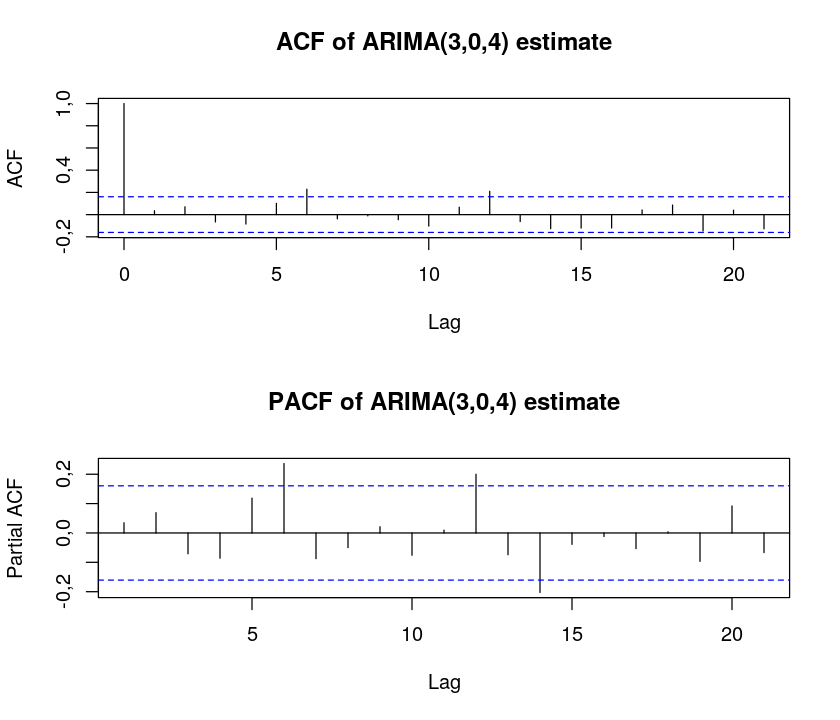

In [43]:
plot.acf(arima.estimate6$resid[-1], col = 'ARIMA(3,0,4) estimate', is.df = F)

En el el gráfico ACF, apreciamo retrasos significativos que no son cero, lo que indica que el componente AR no se haeliminado completamente.    
El gráfico PACF tiene valores significativos que indican que el componente MA tampoco se ha eliminado por completo.    
Ambas gráficas tienen valores notablemente menos significativos que los del residuo de descomposición de STL, lo que indica que puede ser una buena estimación para el residuo de STL.


#### Predicción    


El paquete de predicción de R, tiene herramientas para estimar automáticamente los modelos estacionales ARIMA óptimos y usar estos modelos para hacer pronósticos futuros.

La función auto.arima del paquete de pronóstico hace lo siguiente:

* Realiza una regresión progresiva paso a paso, a partir del orden máximo de cada coeficiente para encontrar el modelo estacional ARIMA óptimo. La opimización se realiza utilizando el Criterio de Información de Akaike (AIC) y el Criterio de Información Bayesiana (BIC).
* El modelo estacional de ARIMA se puede escribir como ARIMA (p, d, q) (P, D, Q). Ya hemos explorado el modelo estándar de ARIMA, ARIMA (p, d, q). Los términos estacionales adicionales modelan el comportamiento estacional y de tendencia:
* P es el orden del modelo autorregresivo estacional.
* D es el orden de un operador diferenciador o integrador, que modela la tendencia.
* Q es el orden del modelo de media móvil estacional.

Los Criterios de Información Bayesianos o BIC están estrechamente relacionados con el Criterio de Información de Akaike. El BIC pondera el número de parámetros en el modelo por el logaritmo del número de observaciones.

Usaremos auto.arima para ajustar un modelo lineal a nuestra serie temporal mensual la de tasa de desempleo nacional y lo usaremos para pronosticar las tasas de desempleo futuras, es decir, lo usaremos para predecir las tasas de desempleo de ***diciembre de 2018 a mayo de 2019***.



In [44]:
fit.tasa_nacional <- auto.arima((tasa_desempleo), max.p = 5, max.q = 5, max.P = 2,
  max.Q = 2, max.order = 5, max.d = 2, max.D = 2, start.p = 0,
  start.q = 0, start.P = 0, start.Q = 0)
summary(fit.tasa_nacional)

Series: (tasa_desempleo) 
ARIMA(2,1,0)(2,1,0)[12] 

Coefficients:
         ar1     ar2     sar1     sar2
      0,5522  0,2080  -0,3125  -0,2480
s.e.  0,0836  0,0844   0,0832   0,0888

sigma^2 estimated as 4,316e-07:  log likelihood=810,09
AIC=-1610,17   AICc=-1609,72   BIC=-1595,57

Training set error measures:
                        ME         RMSE          MAE        MPE      MAPE
Training set -9,583378e-06 0,0006186107 0,0004612734 0,03507639 0,5945837
                   MASE        ACF1
Training set 0,05673941 -0,01078193


De estos resultados notamos los siguientes puntos:

* El modelo estimado es ARIMA(2,1,0)(2,1,0).    
  ${σ}^2$ de la serie original =  0,0004   
  ${σ}^2$ del modelo estimado = 4,316e-07

* Los errores estándar de los coeficientes del modelo son generalmente un orden de magnitud menor que los valores de los coeficientes del modelo. Todos los coeficientes de este modelo parecen ser significativos
* Se producen una serie de métricas de error que incluyen:
    Error medio, ME.
    Error cuadrático medio, RMSE.
    Error absoluto medio, MAE.
    Error de predicción media.    
    MPE, error de predicción absoluta media, MAPE y error de cuadratura absoluta media, o MASE. El error de predicción se calcula actualizando iterativamente el modelo en una ventana de tiempo y midiendo el error de predecir el siguiente valor más allá de la ventana. Se observa que el MAPE es bastante alto en comparación con los otros errores.
* ACF1 es la coeficiente de autocorrelación de primer orden, es decir, la correlación del residuo del modelo en el primer desfase distinto de cero, o retardo 1.
Usamos el modelo óptimo estimado para hacer predicciones.




Forecast method: ARIMA(2,1,0)(2,1,0)[12]

Model Information:
Series: (tasa_desempleo) 
ARIMA(2,1,0)(2,1,0)[12] 

Coefficients:
         ar1     ar2     sar1     sar2
      0,5522  0,2080  -0,3125  -0,2480
s.e.  0,0836  0,0844   0,0832   0,0888

sigma^2 estimated as 4,316e-07:  log likelihood=810,09
AIC=-1610,17   AICc=-1609,72   BIC=-1595,57

Error measures:
                        ME         RMSE          MAE        MPE      MAPE
Training set -9,583378e-06 0,0006186107 0,0004612734 0,03507639 0,5945837
                   MASE        ACF1
Training set 0,05673941 -0,01078193

Forecasts:
         Point Forecast      Lo 80      Hi 80      Lo 95      Hi 95
Jul 2018     0,06695405 0,06611212 0,06779597 0,06566643 0,06824166
Aug 2018     0,06794519 0,06639061 0,06949976 0,06556767 0,07032270
Sep 2018     0,06867115 0,06633882 0,07100348 0,06510416 0,07223814
Oct 2018     0,07012404 0,06700303 0,07324504 0,06535087 0,07489720
Nov 2018     0,07021723 0,06631115 0,07412330 0,06424340 0,0761910

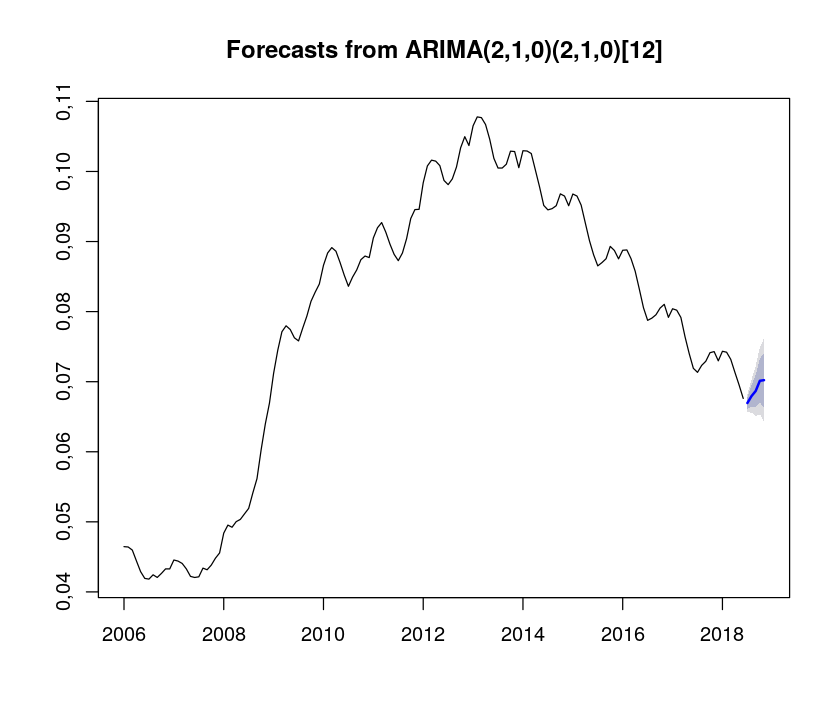

In [69]:
tasa.forecast <- forecast(fit.tasa_nacional, h=5)
summary(tasa.forecast)
plot(tasa.forecast)

Vamos a ver el error mediante el RMSE, que nos da el error en las mismas unidades que las variables y comparar los resultados gráficamente.

In [111]:
forecasting <- as.numeric(tasa.forecast$mean)
forecasting_df <- data.frame(forecasting)
row.names(forecasting_df) <- NULL
real_df <- tasa_media_nov2018[c(151:155), ]
row.names(real_df) <- NULL
real_df$forecasting <- forecasting_df$forecasting
real_df


year,month,rate,forecasting
2018,7,"0,06703303","0,06695405"
2018,8,"0,06803881","0,06794519"
2018,9,"0,06847722","0,06867115"
2018,10,"0,06959319","0,07012404"
2018,11,"0,06955478","0,07021723"


In [124]:
RMSE <- sqrt(mean((real_df$rate - real_df$forecasting)^2))

RMSE

[1] 0,0003932542

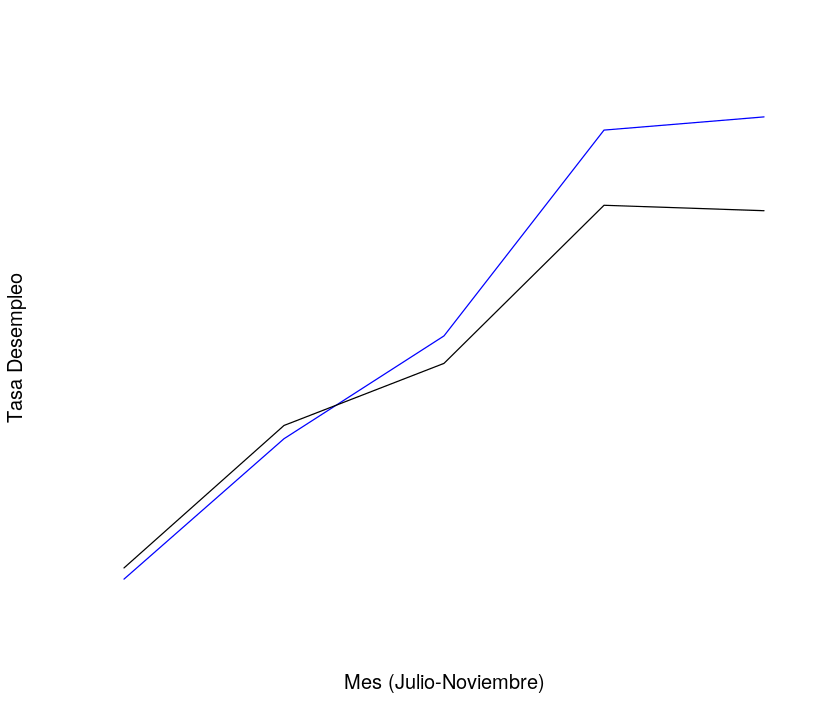

In [131]:
plot(real_df$month, real_df$forecasting, type="l", col='blue', axes = FALSE, xlab='Mes (Julio-Noviembre)', ylab='Tasa Desempleo' )
lines(real_df$month, real_df$rate, col ='black')

Vemos que la linea de predicción (azul) se ajusta relativamente bien a la real(línea negra). De hecho la línea azul, está mucho más próxima a la negra que en los intervalos de confianza gris oscuro(80%) y gris claro(95%) del gráfico anterior. Támbien se ve que cuanto mas nos alejamos del mes de junio (último dato empleado en el set de train), mayor es el error. Si al hacer la predicción, le metemos al modelo los datos reales del mes anterior, mejoraría para los último meses predichos.